In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [5]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [2]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

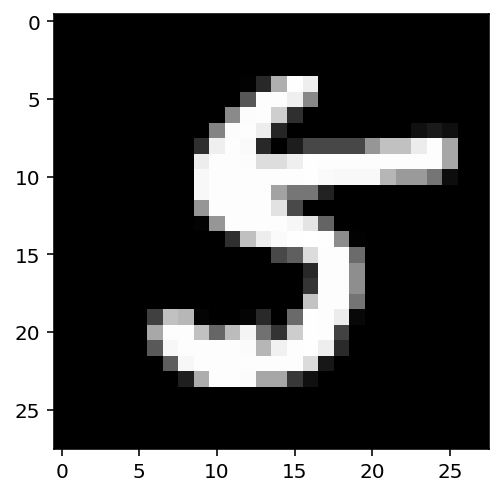

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        self.layer1 = nn.Sequential(
                nn.Conv2d(1,16,kernel_size=3), # 16, 26 ,26
                nn.BatchNorm2d(16),
                nn.ReLU(inplace=True))
        
        self.layer2 = nn.Sequential(
                nn.Conv2d(16,32,kernel_size=3),# 32, 24, 24
                nn.BatchNorm2d(32),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2,stride=2)) # 32, 12,12     (24-2) /2 +1
        
        self.layer3 = nn.Sequential(
                nn.Conv2d(32,64,kernel_size=3), # 64,10,10
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True))
        
        self.layer4 = nn.Sequential(
                nn.Conv2d(64,128,kernel_size=3),  # 128,8,8
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2,stride=2))  # 128, 4,4
        
        self.fc = nn.Sequential(
                nn.Linear(128 * 4 * 4,1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024,128),
                nn.ReLU(inplace=True),
                nn.Linear(128,10))
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        
        return x


In [9]:
model = CNN()

In [12]:
images, labels = next(iter(trainloader))
#images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(,1, 28, 28), ps)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [16, 1, 3, 3], but got 3-dimensional input of size [1, 28, 28] instead